In [348]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from calendar import month_name

In [349]:
data = pd.read_csv('../historic_appts_first_pred_raw.csv')
data

,appointment_id,age_deid,bmi_deid,ethnicity,ethnic_category_black,ethnic_category_unknown,gender_male,imd19_quintile,main_spoken_language_other,current_smoker,...,service_mapping_priority,service_mapping_surgical,weekswaiting,no_show,did_not_attend_risk,did_not_attend_risk_group,prediction_type,case_control,use_case,appt_date
0,10079786,52,27.45,NaN,0,1,1,2,0,0,...,0,0,NaN,0.0,0.264963,High Risk,First prediction,1.0,3,2024-03-20
1,10164094,52,27.45,NaN,1,0,1,2,0,1,...,0,0,NaN,1.0,0.266140,High Risk,First prediction,1.0,3,2023-11-24
2,10211058,32,39.45,NaN,0,1,0,2,0,0,...,0,0,NaN,1.0,0.062844,Low Risk,First prediction,1.0,3,2024-01-19
3,10550310,72,39.45,NaN,1,0,1,4,0,0,...,0,0,NaN,0.0,0.040898,Low Risk,First prediction,1.0,3,2024-01-19
4,10670198,32,39.45,NaN,1,0,0,2,0,1,...,0,0,NaN,1.0,0.389798,High Risk,First prediction,1.0,3,2023-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139239,13147714,2,27.45,NaN,0,0,0,1,0,0,...,0,0,NaN,1.0,0.160467,Moderate Risk,First prediction,1.0,3,2023-12-29
139240,13257461,67,40.00,NaN,0,0,0,1,0,0,...,0,0,NaN,0.0,0.124008,Moderate Risk,First prediction,1.0,3,2024-02-01
139241,13390142,17,27.45,NaN,1,0,1,3,0,0,...,0,0,NaN,1.0,0.235887,High Risk,First prediction,1.0,3,2024-03-11
139242,13440971,77,21.70,NaN,0,1,1,2,0,0,...,0,0,NaN,1.0,0.163437,Moderate Risk,First prediction,1.0,3,2024-03-20


### Check missing data

In [350]:
# Check for missing values
data.isnull().sum()

appointment_id                               0
age_deid                                     0
bmi_deid                                     0
ethnicity                               139244
ethnic_category_black                        0
ethnic_category_unknown                      0
gender_male                                  0
imd19_quintile                               0
main_spoken_language_other                   0
current_smoker                               0
substance_misuse                             0
smoking_unknown                              0
tfc_name                                139244
patient_on_multiple_pathways            139244
appt_month                                   0
appt_hour                                    0
appt_duration                                0
hospital_service_display                   397
service_mapping                              0
reason_display                               0
appointment_type                             0
new_appt_flag

### Categorical data

<Axes: xlabel='age_deid'>

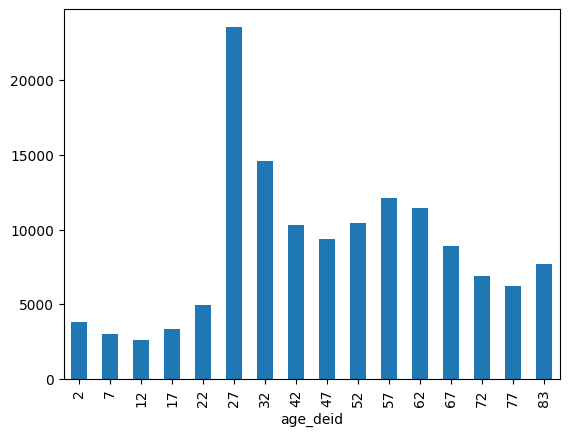

In [351]:
# Plot bar chart for age
data["age_deid"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='bmi_deid'>

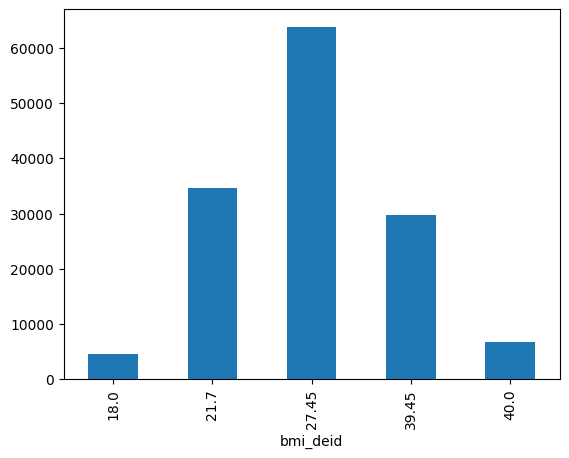

In [352]:
# Plot bar chart for BMI
data["bmi_deid"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='ethnic_category_unknown'>

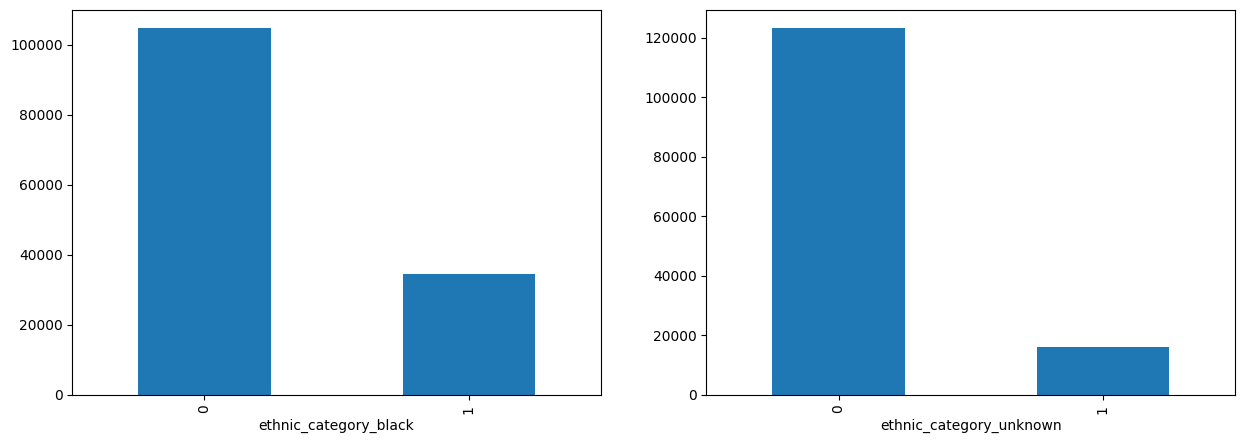

In [353]:
# Plot bar charts for ethnicity, ethnic_category_black, and ethnic_category_unknown
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

data["ethnic_category_black"].value_counts().sort_index().plot(kind='bar', ax=axes[0])
data["ethnic_category_unknown"].value_counts().sort_index().plot(kind='bar', ax=axes[1])

<Axes: xlabel='gender_male'>

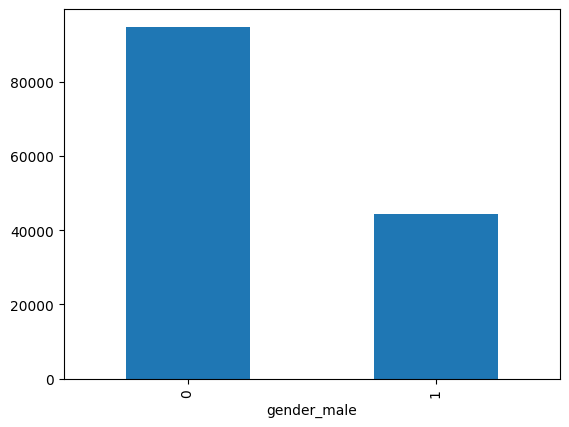

In [354]:
# Plot bar chart for gender_male
data["gender_male"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='imd19_quintile'>

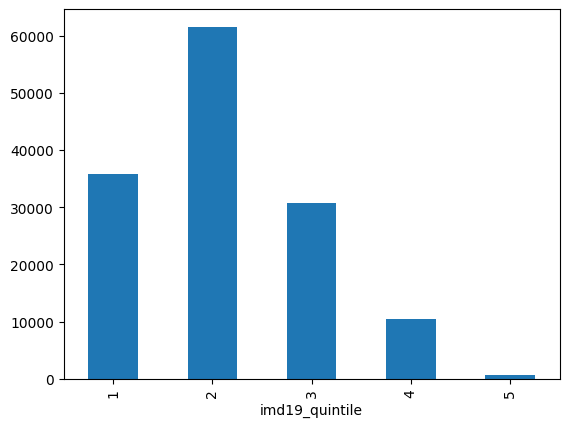

In [355]:
# Plot bar chart for imd19_quintile
data["imd19_quintile"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='main_spoken_language_other'>

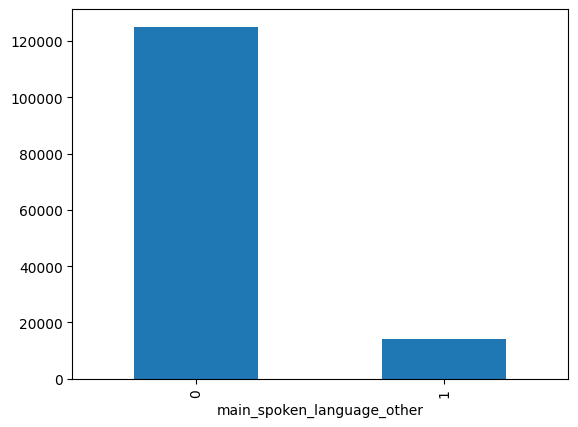

In [356]:
# Plot bar chart for main_spoken_language_other
data["main_spoken_language_other"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='smoking_unknown'>

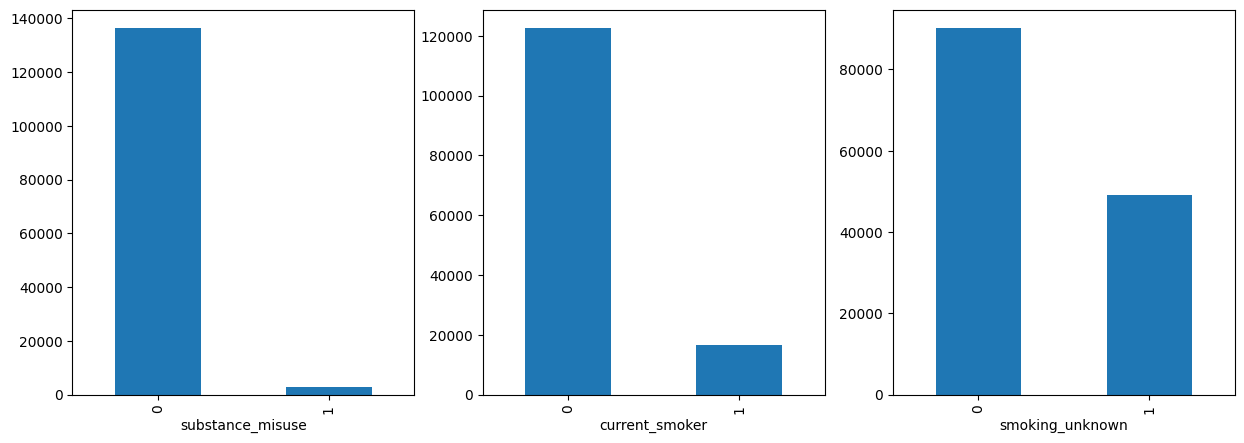

In [357]:
# Plot bar charts for substance_misuse, current_smoker and smoking_unknown
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

data["substance_misuse"].value_counts().sort_index().plot(kind='bar', ax=axes[0])
data["current_smoker"].value_counts().sort_index().plot(kind='bar', ax=axes[1])
data["smoking_unknown"].value_counts().sort_index().plot(kind='bar', ax=axes[2])

<Axes: xlabel='appt_month'>

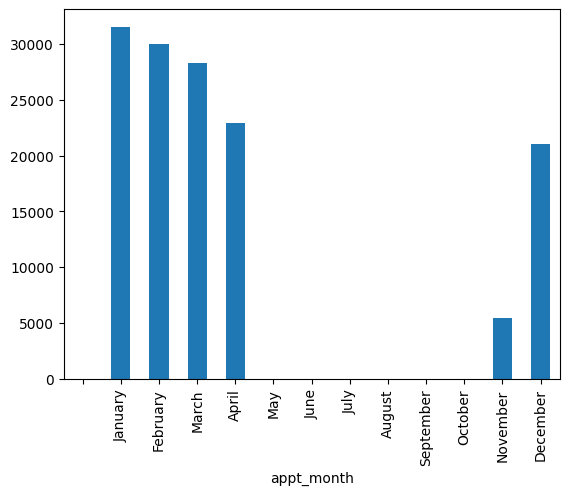

In [358]:
# Plot bar chart for appt_month
month_lookup = list(month_name)
data["appt_month"] = pd.Categorical(data["appt_month"], categories=month_lookup, ordered=True)
data["appt_month"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='hospital_service_display'>

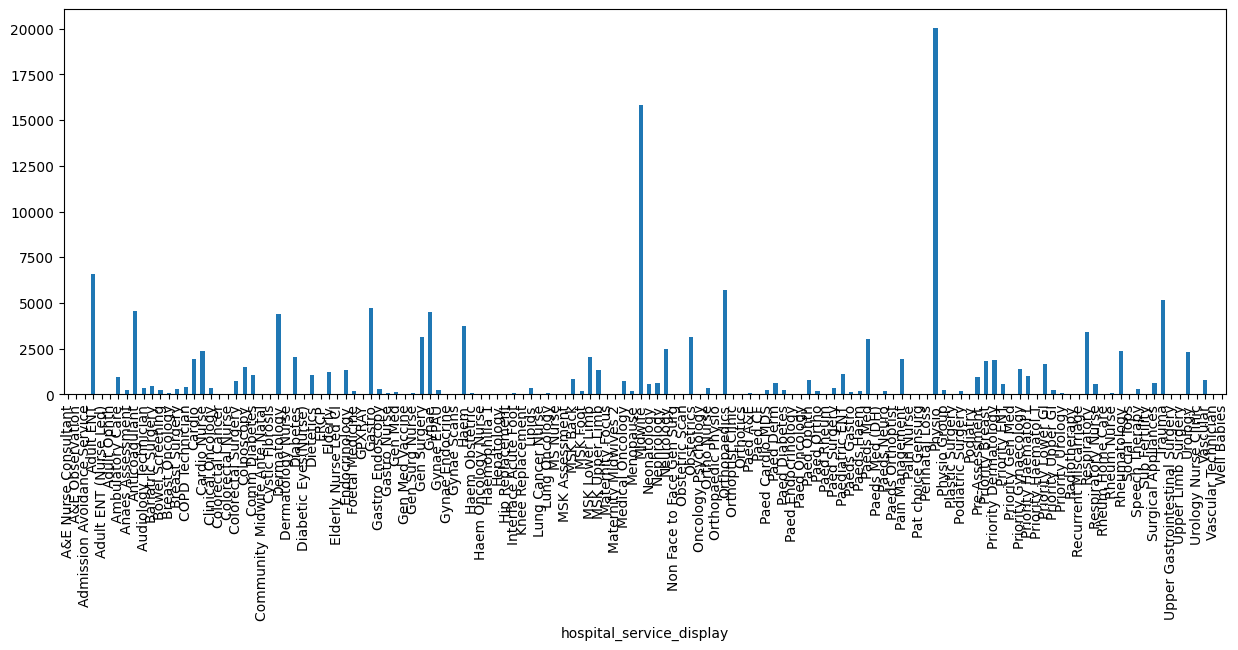

In [359]:
# Plot bar charts for hospital_service_display
plt.figure(figsize=(15, 5))
data["hospital_service_display"].value_counts().sort_index().plot(kind='bar')


<Axes: xlabel='service_mapping'>

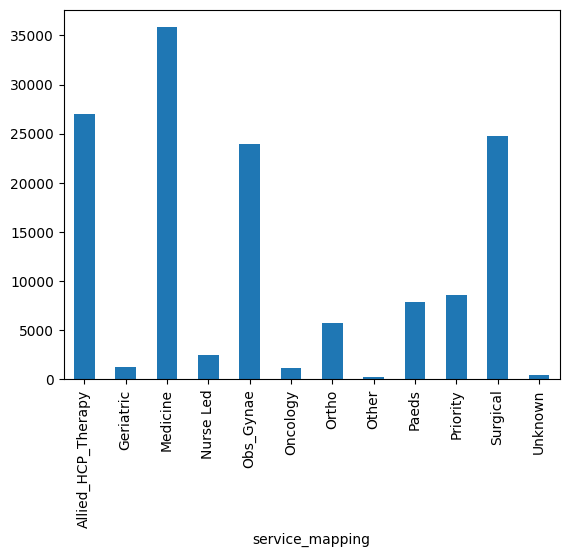

In [360]:
# Plot bar charts for service_mapping
data["service_mapping"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='reason_display'>

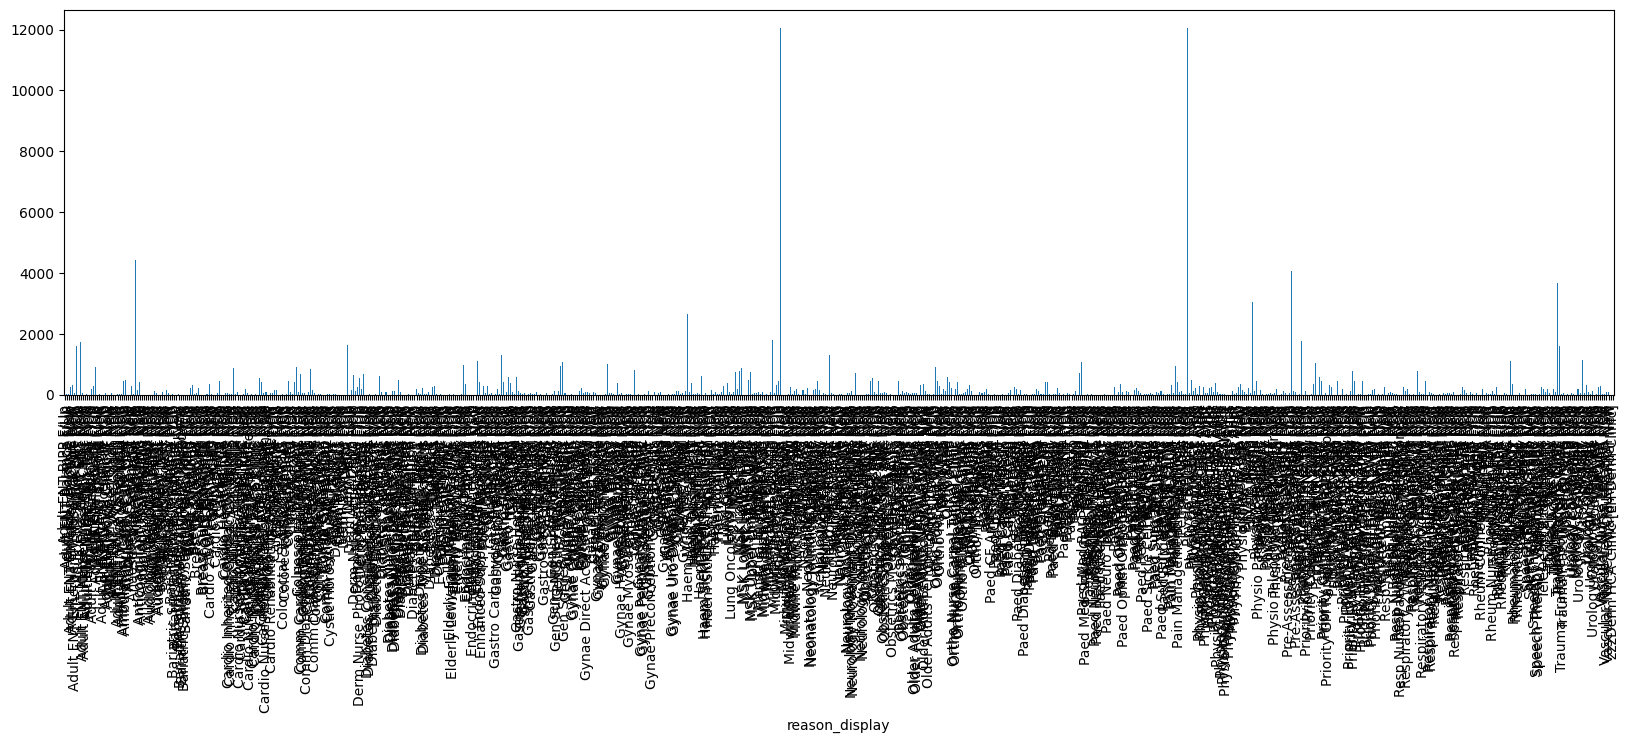

In [361]:
# Plot bar charts for reason_display
plt.figure(figsize=(20, 5))
data["reason_display"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='appointment_type'>

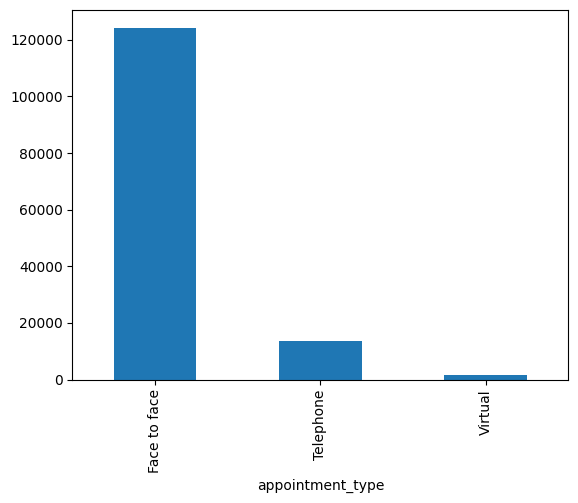

In [362]:
# Plot bar charts for appointment_type
data["appointment_type"].value_counts().sort_index().plot(kind='bar')

new_appt_flag
0    0.673846
1    0.326154
Name: proportion, dtype: float64


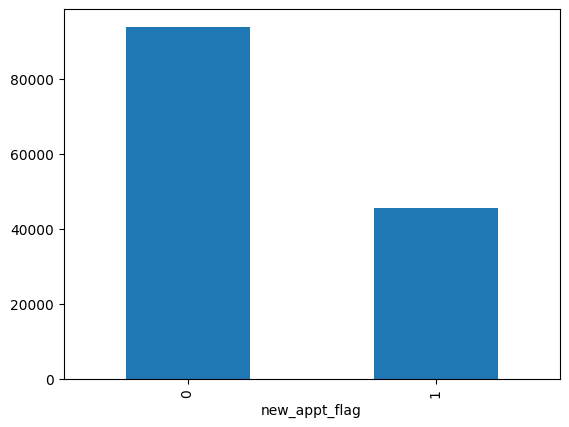

In [363]:
# Plot bar charts for new_appt_flag
data["new_appt_flag"].value_counts().sort_index().plot(kind='bar')
print(data["new_appt_flag"].value_counts(normalize=True))

<Axes: xlabel='appt_hour_2pm_to_3pm'>

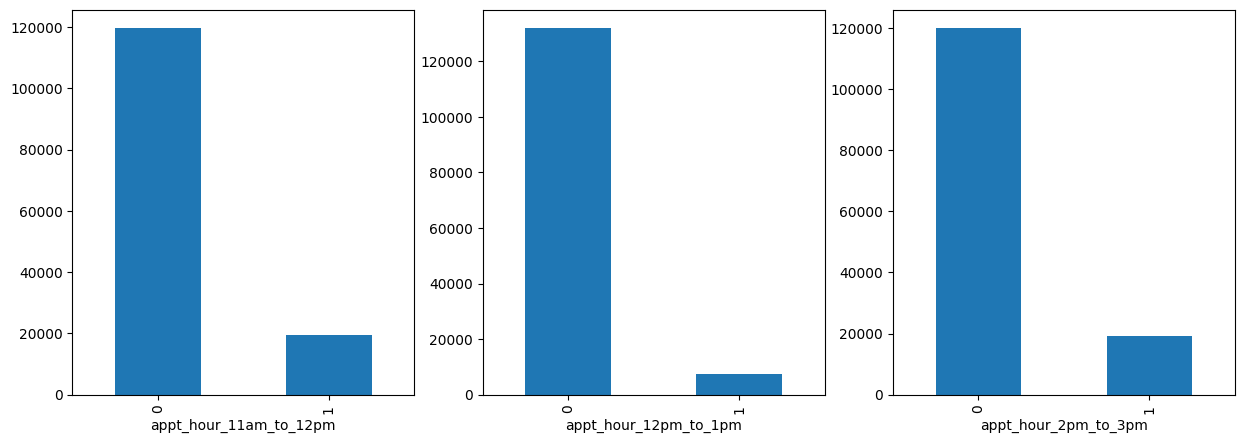

In [364]:
# Plot bar charts for apointment hours
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

data["appt_hour_11am_to_12pm"].value_counts().sort_index().plot(kind='bar', ax=axes[0])
data["appt_hour_12pm_to_1pm"].value_counts().sort_index().plot(kind='bar', ax=axes[1])
data["appt_hour_2pm_to_3pm"].value_counts().sort_index().plot(kind='bar', ax=axes[2])

<Axes: xlabel='appt_season_winter'>

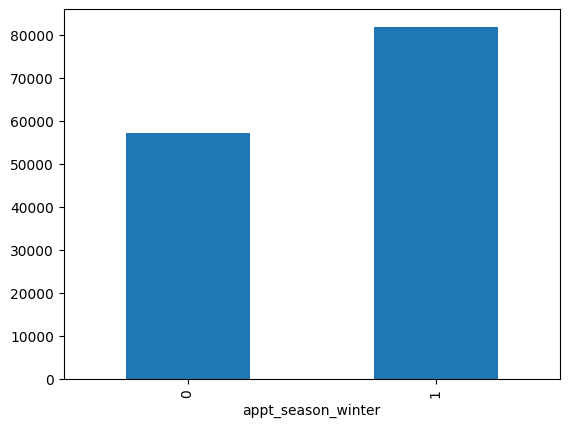

In [365]:
# Plot bar charts for appt_season_winter
data["appt_season_winter"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='emergency_enc_last_12m_three_or_more'>

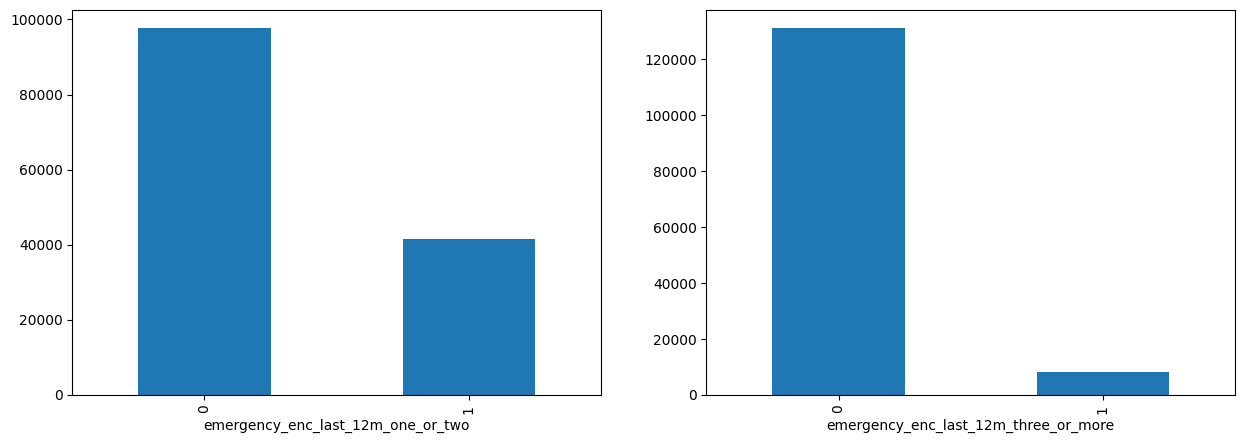

In [366]:
# Plot bar charts for emergency_enc_last_12m_one_or_two and	emergency_enc_last_12m_three_or_more
fig, axes = plt.subplots(1,2, figsize=(15, 5))
data["emergency_enc_last_12m_one_or_two"].value_counts().sort_index().plot(kind='bar', ax = axes[0])
data["emergency_enc_last_12m_three_or_more"].value_counts().sort_index().plot(kind='bar', ax = axes[1])

<Axes: xlabel='num_reschedules_two_or_more'>

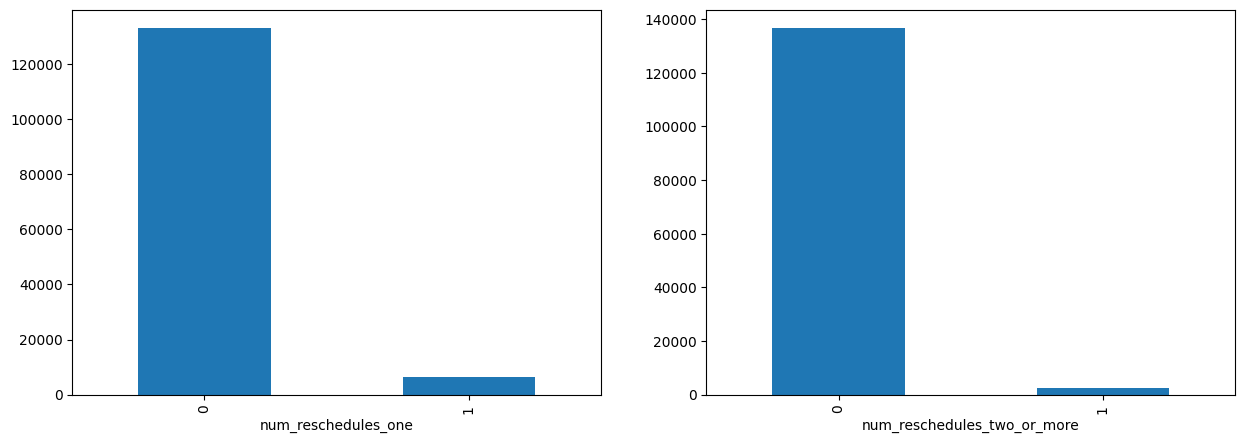

In [367]:
# Plot bar charts of # of reschedules
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
data["num_reschedules_one"].value_counts().sort_index().plot(kind='bar', ax=axes[0])
data["num_reschedules_two_or_more"].value_counts().sort_index().plot(kind='bar', ax=axes[1])

<Axes: xlabel='other_vulnerability'>

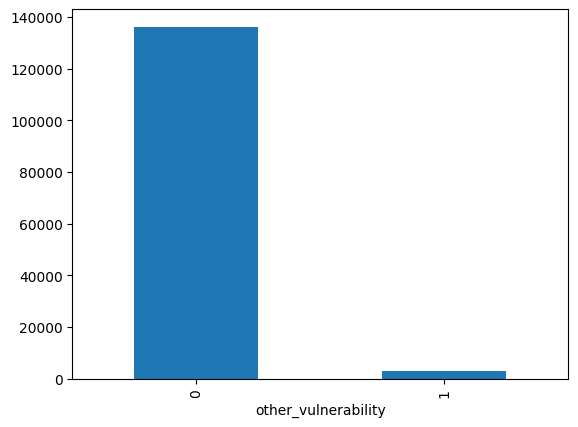

In [368]:
# Plot bar charts for other_vulnerability
data["other_vulnerability"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='past_no_show_count_three_or_more'>

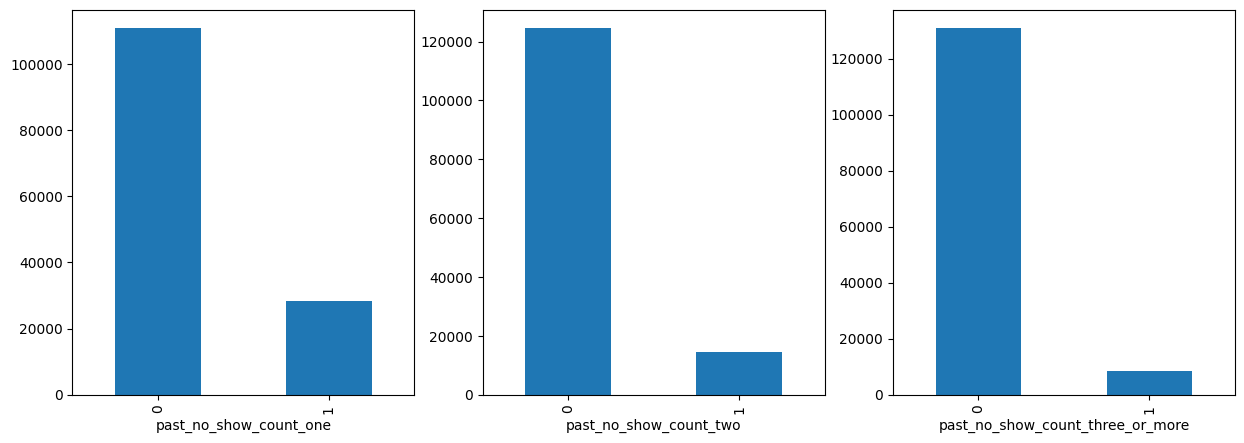

In [369]:
# Plot bar charts for past no shows
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

data["past_no_show_count_one"].value_counts().sort_index().plot(kind='bar', ax=axes[0])
data["past_no_show_count_two"].value_counts().sort_index().plot(kind='bar', ax=axes[1])
data["past_no_show_count_three_or_more"].value_counts().sort_index().plot(kind='bar', ax=axes[2])

<Axes: xlabel='phone_number'>

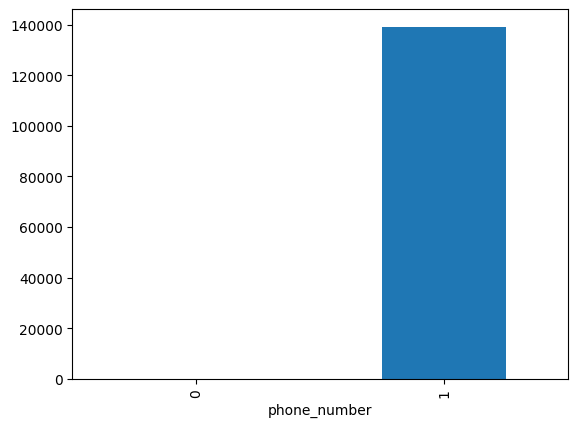

In [370]:
# Plot bar chart for phone_number
data["phone_number"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='physically_inactive'>

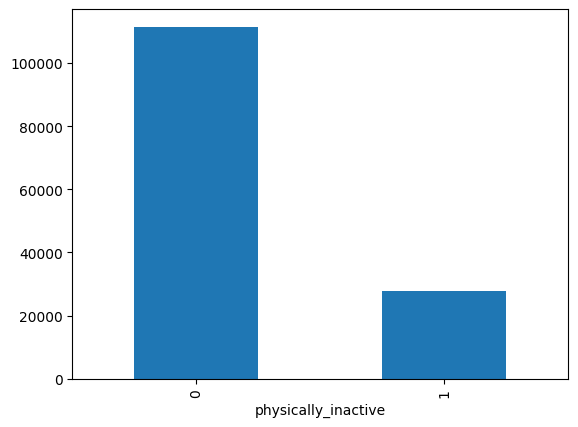

In [371]:
# Plot bar chart for physically_inactive
data["physically_inactive"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='safeguarding'>

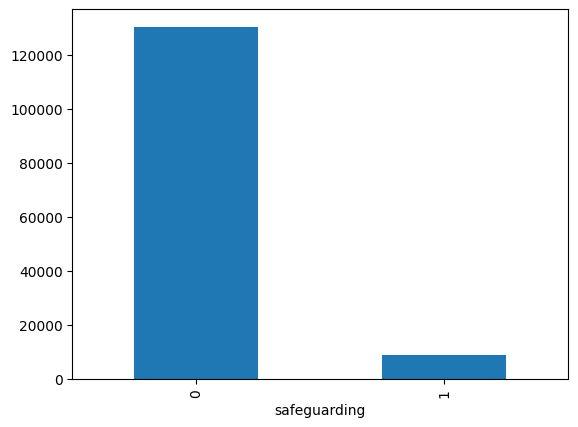

In [372]:
# Plot bar chart for safeguarding
data["safeguarding"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='service_mapping_priority'>

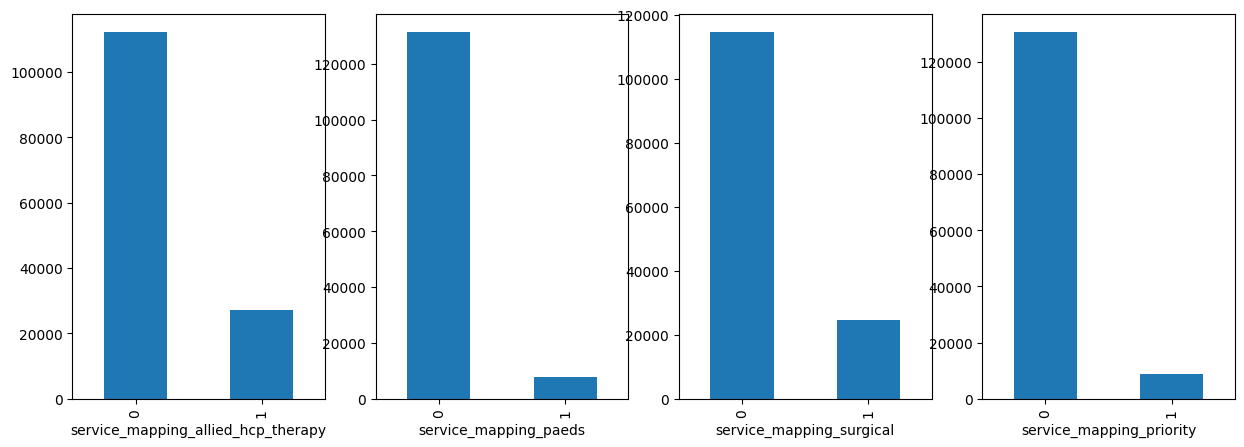

In [373]:
# Plot charts for service mappings
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

data["service_mapping_allied_hcp_therapy"].value_counts().sort_index().plot(kind='bar', ax=axes[0])
data["service_mapping_paeds"].value_counts().sort_index().plot(kind='bar', ax=axes[1])
data["service_mapping_surgical"].value_counts().sort_index().plot(kind='bar', ax=axes[2])
data["service_mapping_priority"].value_counts().sort_index().plot(kind='bar', ax=axes[3])

did_not_attend_risk_group
Low Risk          0.619014
Moderate Risk     0.254582
High Risk         0.116558
Very High Risk    0.009846
Name: proportion, dtype: float64


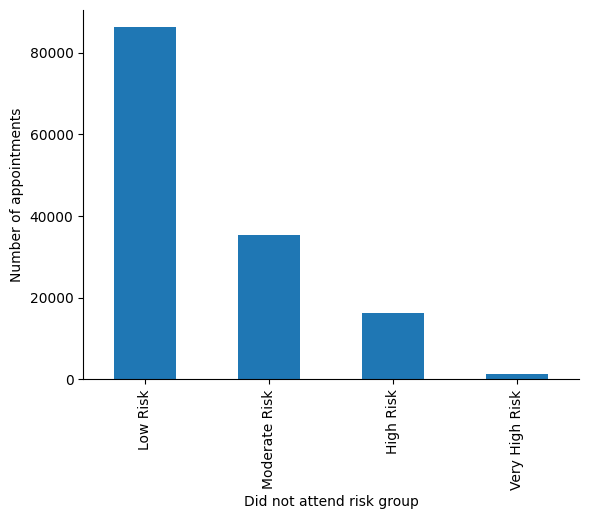

In [374]:
# Plot bar chart for did_not_attend_risk_group
ax = data["did_not_attend_risk_group"].value_counts().plot(kind='bar')
ax.set_xlabel("Did not attend risk group")
ax.set_ylabel("Number of appointments")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print(data["did_not_attend_risk_group"].value_counts(normalize=True))

no_show
0.0    0.888412
1.0    0.111588
Name: proportion, dtype: float64


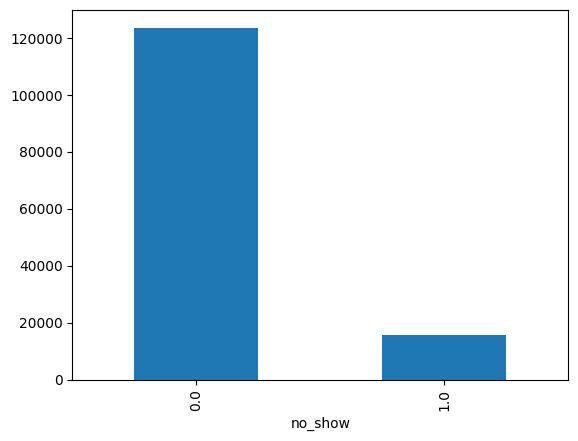

In [375]:
# Plot bar chart for no_show
data["no_show"].value_counts().sort_index().plot(kind='bar')
print(data["no_show"].value_counts(normalize=True))

### Continuous variables

count                           139244
mean     2024-02-11 08:22:27.918761216
min                2023-11-24 00:00:00
25%                2024-01-10 00:00:00
50%                2024-02-12 00:00:00
75%                2024-03-18 00:00:00
max                2024-04-26 00:00:00
Name: appt_date, dtype: object
2024-02-12 00:00:00


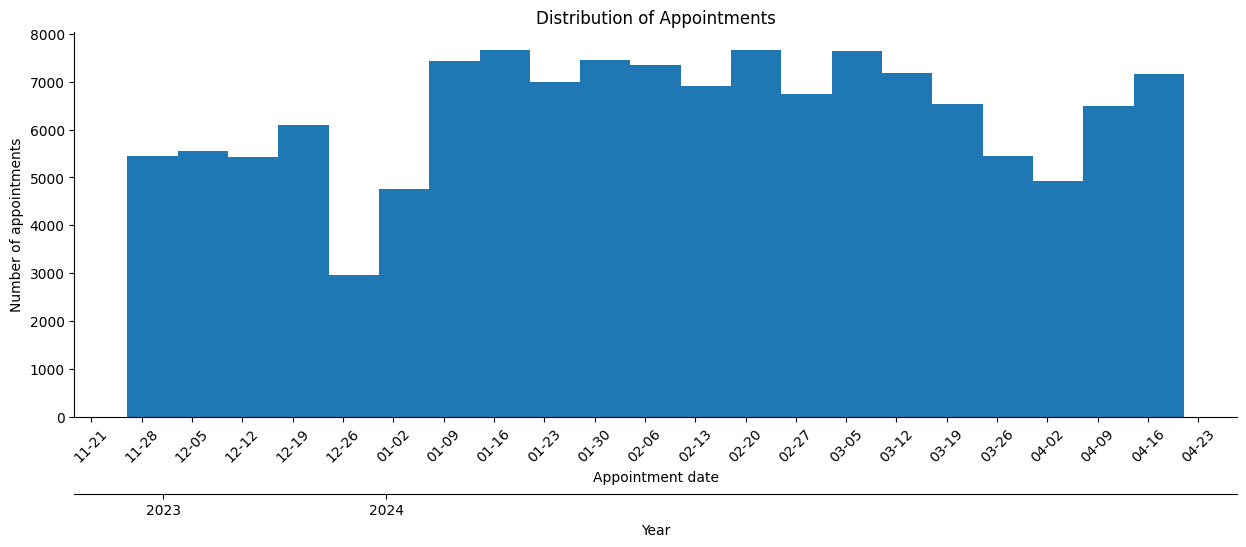

In [376]:
# Plot histogram for appt_date
data["appt_date"] = pd.to_datetime(data["appt_date"])

# Define the bin edges
bin_edges = pd.date_range(start=data["appt_date"].min(), end=data["appt_date"].max(), freq='W')  # Weekly bins

plt.figure(figsize=(15, 5))
plt.hist(data["appt_date"], bins=bin_edges)

# Set x-axis ticks to weekly intervals
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Set major ticks to weekly intervals
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))  # Format the ticks as dates
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a second x-axis with years
secax = ax.secondary_xaxis(-0.2)
secax.set_xticks([mdates.date2num(pd.Timestamp('2023-12-01')), mdates.date2num(pd.Timestamp('2024-01-01'))])
secax.set_xticklabels(['2023', '2024'])
#secax.xaxis.set_tick_params(length=0)  # Hide the tick marks
secax.set_xlabel('Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.xlabel('Appointment date')
plt.ylabel('Number of appointments')
plt.title('Distribution of Appointments')

# Summary statistics for the appointment dates
print(data["appt_date"].describe())
print(data["appt_date"].median())



Text(0, 0.5, 'Number of Appointments')

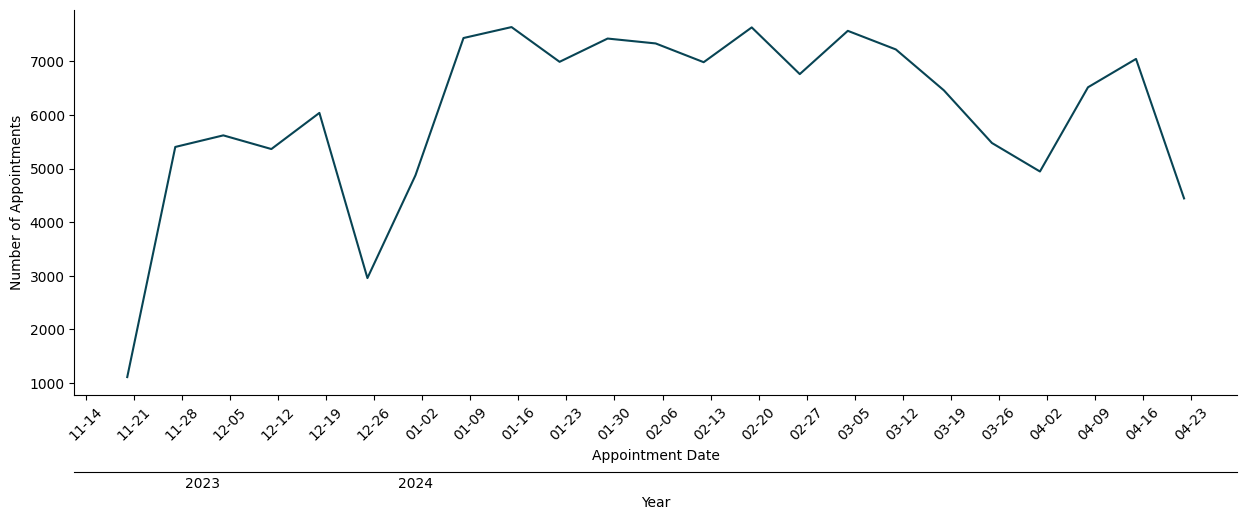

In [377]:
# Plot line plot for weekly appointments

# Aggregate the data by week
weekly_appointments = data["appt_date"].dt.to_period('W').value_counts().sort_index()

# Convert the index to datetime for plotting
weekly_appointments.index = weekly_appointments.index.to_timestamp()

# Plot the line plot for weekly appointments
plt.figure(figsize=(15, 5))
plt.plot(weekly_appointments.index, weekly_appointments.values, color="#084454")

# Set x-axis ticks to weekly intervals
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Set major ticks to weekly intervals
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))  # Format the ticks as dates
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a second x-axis with years
secax = ax.secondary_xaxis(-0.2)
secax.set_xticks([mdates.date2num(pd.Timestamp('2023-12-01')), mdates.date2num(pd.Timestamp('2024-01-01'))])
secax.set_xticklabels(['2023', '2024'])
secax.xaxis.set_tick_params(length=0)  # Hide the tick marks
secax.set_xlabel('Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.xlabel('Appointment Date')
plt.ylabel('Number of Appointments')
#plt.title('Distribution of Historic Appointments by Week')

Text(0.5, 0, 'appt_duration')

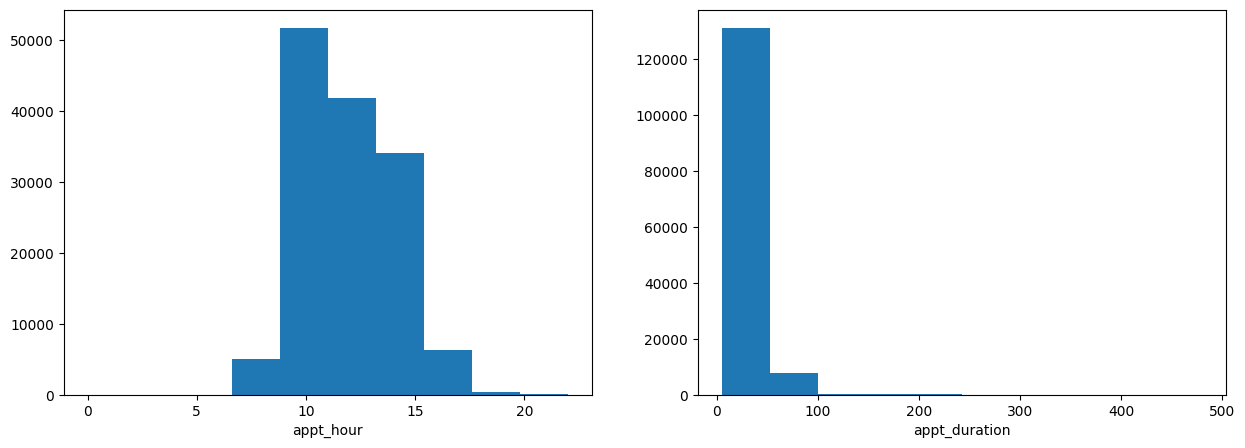

In [378]:
# Plot histograms for appt_hour and appt_duration
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(data["appt_hour"])
axes[0].set_xlabel("appt_hour")
axes[1].hist(data["appt_duration"])
axes[1].set_xlabel("appt_duration")

24.60223061675907
appt_duration
30.0     0.310922
15.0     0.238976
10.0     0.152495
20.0     0.117520
45.0     0.046386
5.0      0.033301
60.0     0.033150
25.0     0.028174
40.0     0.014062
90.0     0.012503
75.0     0.009164
120.0    0.001623
180.0    0.001171
200.0    0.000280
150.0    0.000086
50.0     0.000072
35.0     0.000022
80.0     0.000022
480.0    0.000014
70.0     0.000014
105.0    0.000014
135.0    0.000014
8.0      0.000007
55.0     0.000007
Name: proportion, dtype: float64


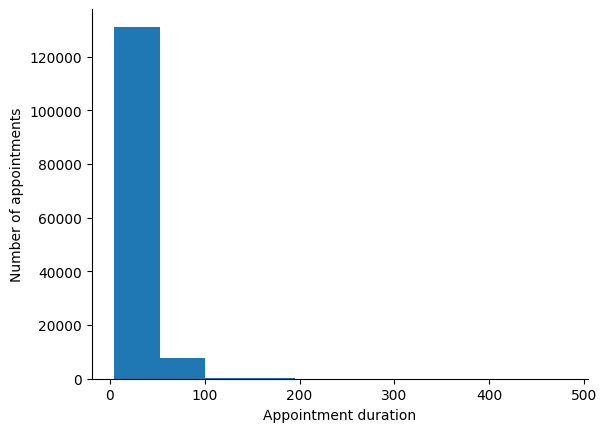

In [379]:
# A standalone plot for appt_duration
plt.hist(data["appt_duration"])
plt.xlabel("Appointment duration")
plt.ylabel("Number of appointments")

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

print(data["appt_duration"].mean())
print(data["appt_duration"].value_counts(normalize=True))

Text(0.5, 0, 'lead_time')

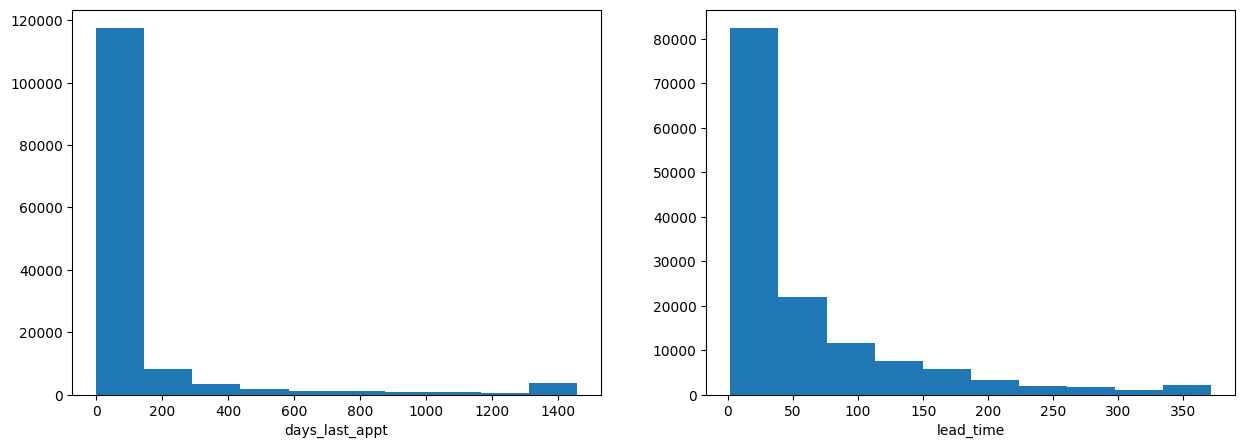

In [380]:
# Plot histograms to wait time
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(data["days_last_appt"])
axes[0].set_xlabel("days_last_appt")
axes[1].hist(data["lead_time"])
axes[1].set_xlabel("lead_time")

Text(0.5, 0, 'past_no_show_rate')

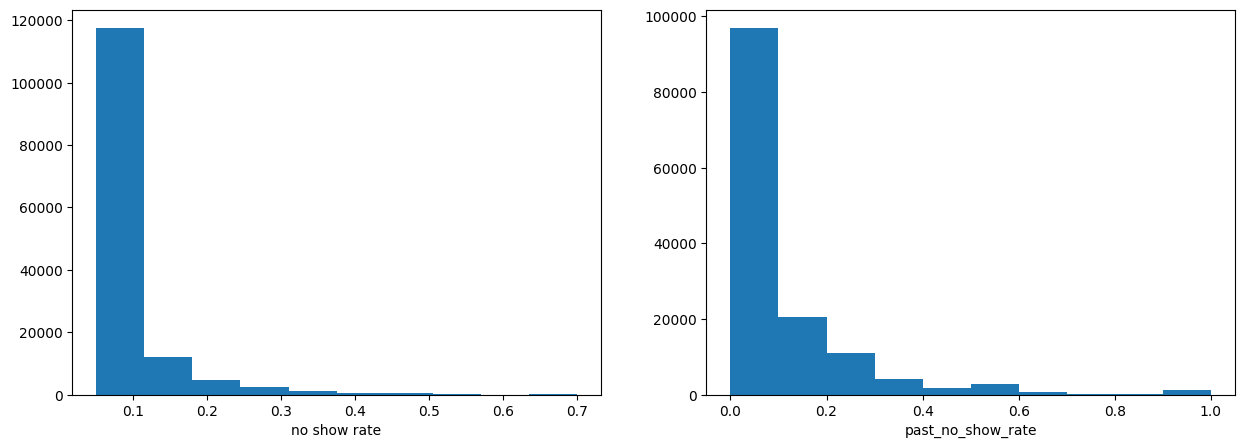

In [381]:
# Plot histograms to no show rate
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(data["ns_rate_seq"])
axes[0].set_xlabel("no show rate")
axes[1].hist(data["past_no_show_rate"])
axes[1].set_xlabel("past_no_show_rate")

Text(0.5, 0, 'op_appts_last_12m')

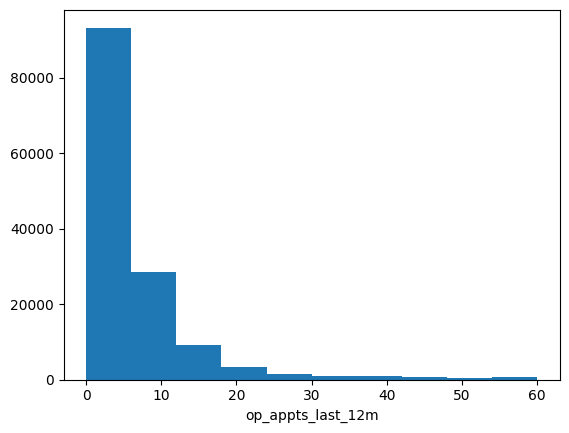

In [382]:
# Plot histogram for op_appts_last_12m
plt.hist(data["op_appts_last_12m"])
plt.xlabel("op_appts_last_12m")

Text(0.5, 0, 'osrm_drive_time')

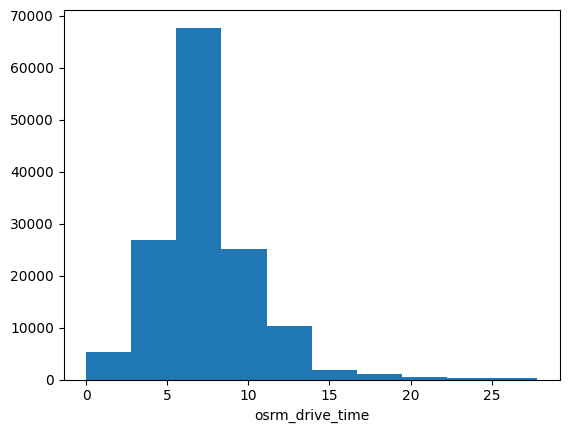

In [383]:
# Plot histogram for osrm_drive_time
plt.hist(data["osrm_drive_time"])
plt.xlabel("osrm_drive_time")

Text(0.5, 0, 'ltc_count')

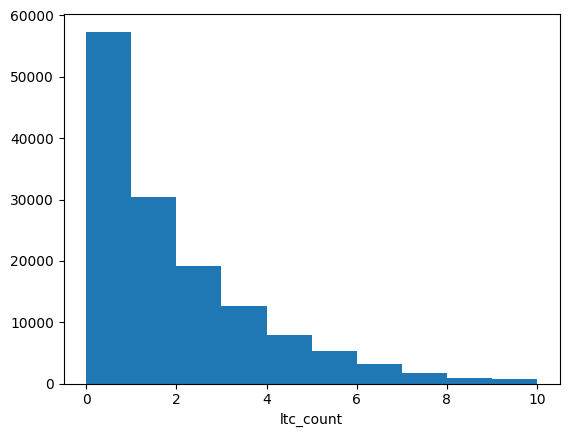

In [384]:
# Plot histogram for ltc_count
plt.hist(data["ltc_count"])
plt.xlabel("ltc_count")

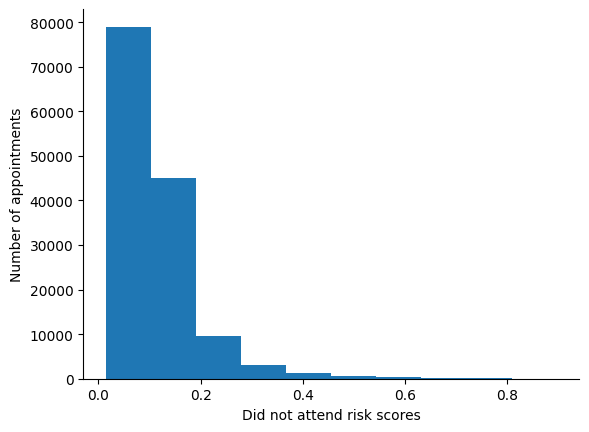

In [385]:
# Plot histogram for did_not_attend_risk
plt.hist(data["did_not_attend_risk"])
plt.xlabel("Did not attend risk scores")
plt.ylabel("Number of appointments")

# Remove top and right borders (spines)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

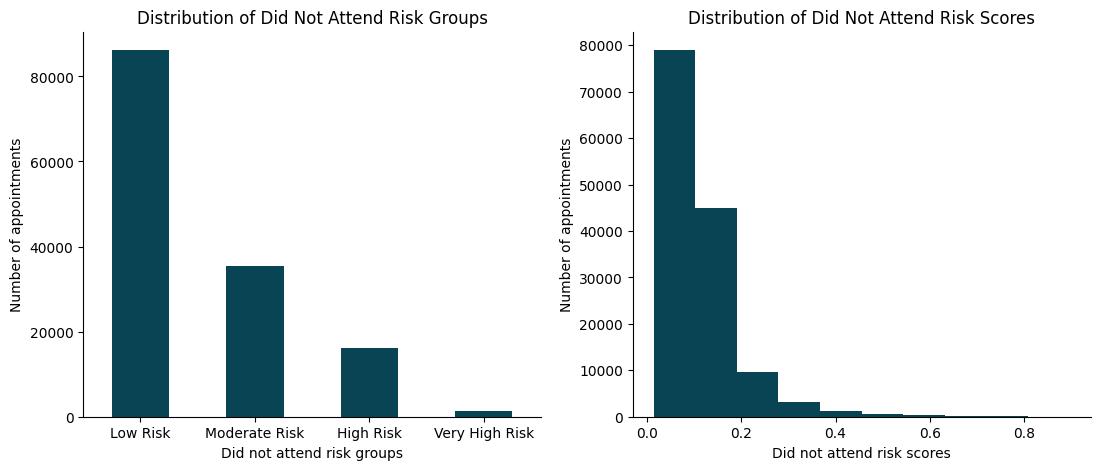

In [386]:
# Combine both DNA risks (groups & scores) into 1 plot

# Create a figure with 1 row and 2 columns of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# Plot the bar chart in the first subplot
data["did_not_attend_risk_group"].value_counts().plot(kind='bar', ax=ax1, color="#084454")
ax1.set_xlabel('Did not attend risk groups')
ax1.set_ylabel('Number of appointments')
ax1.set_title('Distribution of Did Not Attend Risk Groups')
# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', labelrotation=360)

# Remove top and right borders (spines) for the bar chart
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Plot histogram for did_not_attend_risk
ax2.hist(data["did_not_attend_risk"], color="#084454")
ax2.set_xlabel("Did not attend risk scores")
ax2.set_ylabel("Number of appointments")
ax2.set_title("Distribution of Did Not Attend Risk Scores")

# Remove top and right borders (spines)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
